In [22]:
import pandas as pd
import numpy as np
from KPI_Scoring import *

In [23]:
cols = ['Side', 'Region', 'Year', 'Game ID', 'Team', 'Victory', 'Game Duration',
       'Player', 'Role', 'Kills', 'Deaths', 'Assists', 'KDA', 'CS',
       "CS in Team's Jungle", 'CSM', 'Golds', 'GPM', 'GOLD%', 'Vision Score',
       'Wards placed', 'Wards destroyed', 'Control Wards Purchased', 'VSPM',
       'WPM', 'VWPM', 'WCPM', 'VS%', 'Total damage to Champion',
       'Physical Damage', 'Magic Damage', 'True Damage', 'DPM', 'DMG%',
       'K+A Per Minute', 'KP%', 'Solo kills', 'Double kills', 'Triple kills',
       'Quadra kills', 'Penta kills', 'GD@15', 'CSD@15', 'XPD@15', 'LVLD@15',
       'Damage dealt to turrets', 'Total heal', 'Time ccing others',
       'Total damage taken']

In [24]:
df = pd.read_csv('../data/clean_game_data.csv', index_col=0)

agression_df, setup_df, economy_df, early_game_df = create_kpi_split_df(df)


In [25]:
from sklearn.preprocessing import StandardScaler

agressionScaler = StandardScaler()
setupScaler = StandardScaler()
economyScaler = StandardScaler()
early_gameScaler = StandardScaler()

agression_vector = agression_df.values
setup_vector = setup_df.values
economy_vector = economy_df.values
early_game_vector = early_game_df.values

agression_scaled = agressionScaler.fit_transform(agression_vector)
setup_scaled = setupScaler.fit_transform(setup_vector)
economy_scaled = economyScaler.fit_transform(economy_vector)
early_game_scaled = early_gameScaler.fit_transform(early_game_vector)


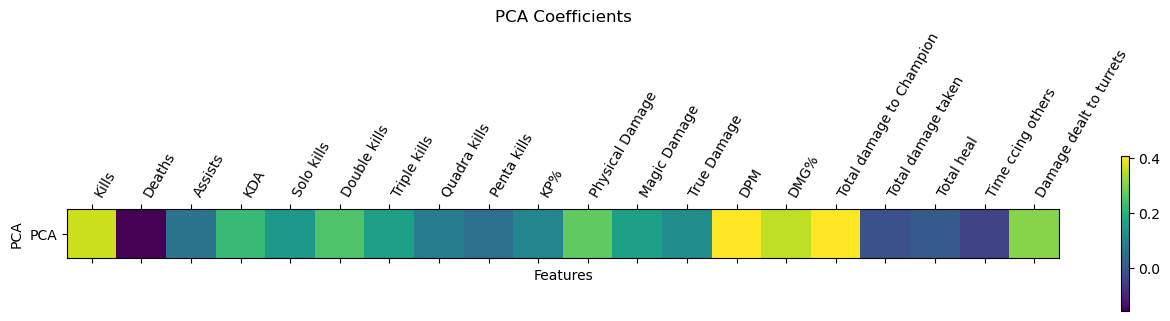

[ 0.11202694 -0.04886113  0.01856035  0.06961646  0.04439204  0.07756553
  0.04945381  0.02500601  0.01519207  0.0313677   0.08279834  0.05039605
  0.03685389  0.12555813  0.10902837  0.12555843 -0.00579656  0.00081007
 -0.01313592  0.09360941]
Most aggressive player: Caps with a score of 3.8040711313668427 in game 24666
Least aggressive player: Ceos with a score of -1.2587635508625568 in game 48999
Side                        Blue Side
Region                            MSI
Year                             2023
Game ID                         48999
Team                             LOUD
Victory                         False
Game Duration                  28.283
Player                           Ceos
Role                          SUPPORT
Kills                               0
Deaths                              9
Assists                             3
KDA                               0.3
CS                                 31
CS in Team's Jungle                 0
CSM                        

In [26]:
# PCA for agression to deduce the most important features to get weights for the weighted score calculation

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
agression_pca = pca.fit_transform(agression_scaled)

# Plotting cooefficients with the original features

import matplotlib.pyplot as plt

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0], ['PCA'])
plt.colorbar()
plt.xticks(range(len(agression_df.columns)), agression_df.columns, rotation=60, ha='left')
plt.xlabel('Features')
plt.ylabel('PCA')
plt.title('PCA Coefficients')
plt.show()

weights = pca.components_[0]
weights = weights / np.sum(weights)

# Calculating the weighted score for each player

agressionWeights = weights
print(agressionWeights)

agression_score = np.dot(agression_scaled, agressionWeights)
argmax = np.argmax(agression_score)
print(f"Most aggressive player: {df.iloc[argmax]['Player']} with a score of {agression_score[argmax]} in game {df.iloc[argmax]['Game ID']}")
argmin = np.argmin(agression_score)
print(f"Least aggressive player: {df.iloc[argmin]['Player']} with a score of {agression_score[argmin]} in game {df.iloc[argmin]['Game ID']}")

# printing stats and name for the player with the lowest score
print(df.iloc[argmin])



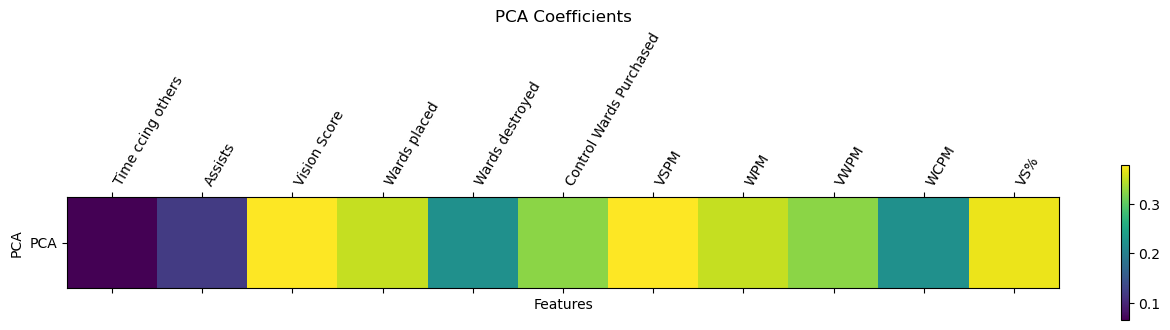

Most setup player: Rich with a score of 6.736329212821506 in game 32215
Least setup player: Serin with a score of 0.13082142383706438 in game 44304
Teddy
2.0494700088768676
Time ccing others          22.000000
Assists                     0.142314
Vision Score                3.700172
Wards placed                2.234335
Wards destroyed             0.711572
Control Wards Purchased     0.142314
VSPM                        3.700000
WPM                         2.230000
VWPM                        0.140000
WCPM                        0.710000
VS%                         0.387000
Name: 4, dtype: float64
Time ccing others          288.000000
Assists                      0.085389
Vision Score                 2.020863
Wards placed                 0.483869
Wards destroyed              0.441174
Control Wards Purchased      0.099620
VSPM                         2.020000
WPM                          0.480000
VWPM                         0.100000
WCPM                         0.440000
VS%             

In [27]:
# PCA for setup to deduce the most important features to get weights for the weighted score calculation

pca = PCA(n_components=1)
setup_pca = pca.fit_transform(setup_scaled)

# Plotting cooefficients with the original features

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0], ['PCA'])
plt.colorbar()
plt.xticks(range(len(setup_df.columns)), setup_df.columns, rotation=60, ha='left')
plt.xlabel('Features')
plt.ylabel('PCA')
plt.title('PCA Coefficients')
plt.show()

weights = pca.components_[0]

weights = weights / np.sum(weights)

setupWeights = weights

# Calculating the weighted score for each player

setup_score = np.dot(setup_df, setupWeights)
argmax = np.argmax(setup_score)
print(f"Most setup player: {df.iloc[argmax]['Player']} with a score of {setup_score[argmax]} in game {df.iloc[argmax]['Game ID']}")
argmin = np.argmin(setup_score)
print(f"Least setup player: {df.iloc[argmin]['Player']} with a score of {setup_score[argmin]} in game {df.iloc[argmin]['Game ID']}")

print(df.iloc[argmax-1]['Player'])
print(setup_score[argmax-1])
print(setup_df.iloc[argmax-1])
print(setup_df.iloc[argmax])

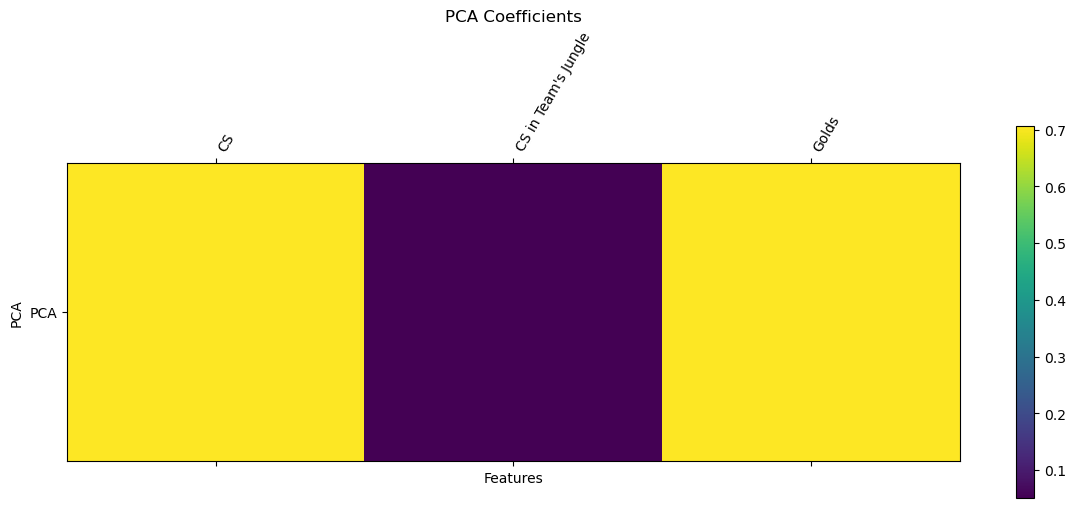

PCA Coefficients: [0.48230013 0.03489134 0.48280853]
Most economic player: Prince with a score of 2.63208651932177 in game 41577
Least economic player: Aphromoo with a score of -2.0192905952731905 in game 25322
Prince
2.63208651932177
CS                      12.682105
CS in Team's Jungle      2.247462
Golds                  658.546374
Name: 3, dtype: float64


In [28]:
# PCA for economy to deduce the most important features to get weights for the weighted score calculation

pca = PCA(n_components=1)
economy_pca = pca.fit_transform(economy_scaled)

# Plotting cooefficients with the original features

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0], ['PCA'])
plt.colorbar()
plt.xticks(range(len(economy_df.columns)), economy_df.columns, rotation=60, ha='left')
plt.xlabel('Features')
plt.ylabel('PCA')
plt.title('PCA Coefficients')
plt.show()

weights = pca.components_[0]
weights = weights / np.sum(weights)
print(f"PCA Coefficients: {weights}")

# Calculating the weighted score for each player

economyWeights = weights

economy_score = np.dot(economy_scaled, economyWeights)
argmax = np.argmax(economy_score)
print(f"Most economic player: {df.iloc[argmax]['Player']} with a score of {economy_score[argmax]} in game {df.iloc[argmax]['Game ID']}")
argmin = np.argmin(economy_score)
print(f"Least economic player: {df.iloc[argmin]['Player']} with a score of {economy_score[argmin]} in game {df.iloc[argmin]['Game ID']}")

print(df.iloc[argmax]['Player'])
print(economy_score[argmax])
print(economy_df.iloc[argmax])


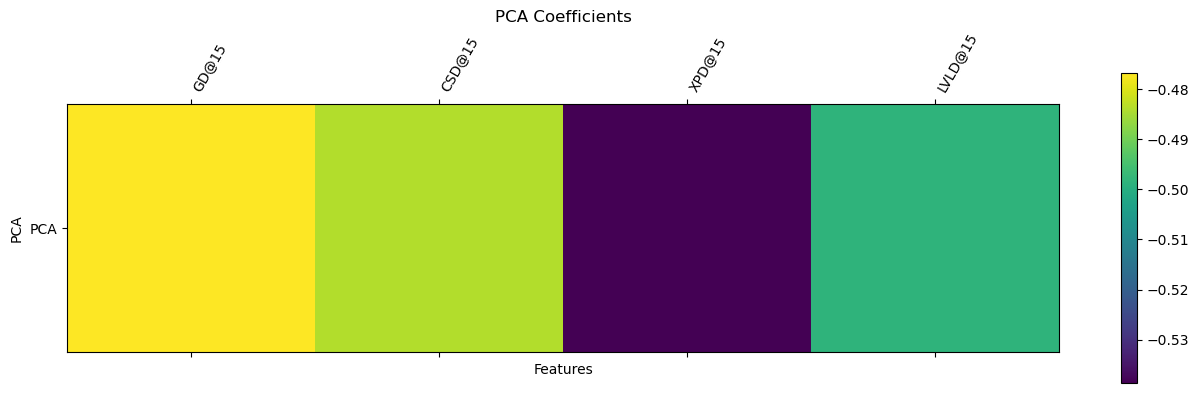

PCA Coefficients: [0.23868074 0.2422143  0.26963035 0.24947461]
Most early game player: Revenge with a score of 5.762757489903094 in game 37465
Least early game player: Huni with a score of -5.762757489903094 in game 37465
Huni
-5.762757489903094
GD@15     -4570
CSD@15     -111
XPD@15    -4195
LVLD@15      -4
Name: 0, dtype: int64


In [29]:
# PCA for early game to deduce the most important features to get weights for the weighted score calculation

pca = PCA(n_components=1)
early_game_pca = pca.fit_transform(early_game_scaled)

# Plotting cooefficients with the original features

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0], ['PCA'])
plt.colorbar()
plt.xticks(range(len(early_game_df.columns)), early_game_df.columns, rotation=60, ha='left')
plt.xlabel('Features')
plt.ylabel('PCA')
plt.title('PCA Coefficients')
plt.show()

earlyWeights = pca.components_[0]
earlyWeights = earlyWeights / np.sum(earlyWeights)
print(f"PCA Coefficients: {earlyWeights}")

# Calculating the weighted score for each player

early_game_score = np.dot(early_game_scaled, earlyWeights)
argmax = np.argmax(early_game_score)
print(f"Most early game player: {df.iloc[argmax]['Player']} with a score of {early_game_score[argmax]} in game {df.iloc[argmax]['Game ID']}")
argmin = np.argmin(early_game_score)
print(f"Least early game player: {df.iloc[argmin]['Player']} with a score of {early_game_score[argmin]} in game {df.iloc[argmin]['Game ID']}")
print(df.iloc[argmin]['Player'])
print(early_game_score[argmin])
print(early_game_df.iloc[argmin])



In [30]:
print(economy_df.min())

CS                       0.000000
CS in Team's Jungle      0.000000
Golds                  169.336066
dtype: float64


In [31]:
# setting min and max vectors for the economy score (all to 0) for min

min_economy = economy_df.min()
min_economy['Golds'] = 100 # Absolute value of 100 GPM
min_economy['CS'] = 2
min_economy["CS in Team's Jungle"] = 2
min_economy = min_economy.values
max_economy = economy_df.max()
max_economy['Golds'] = 600 # Setting to 800GPM as the max gold per minute (beyond is seen as the same)
max_economy['CS'] = 12 # Setting to 12CS per minute (beyond is seen as the same)
max_economy["CS in Team's Jungle"] = 10 # Setting to 10CS per minute (beyond is seen as the same)
max_economy = max_economy.values

# setting min and max vectors for the setup score (all to 0) for min

min_setup = setup_df.min() * 0
min_setup = min_setup.values
max_setup = setup_df.max()
max_setup['Time ccing others'] = 200
max_setup['Assists'] = 1
max_setup['Vision Score'] = 5
max_setup['Wards placed'] = 3
max_setup['Wards destroyed'] = 1.2
max_setup['Control Wards Purchased'] = 1
max_setup['VSPM'] = 6
max_setup['WPM'] = 1
max_setup['VWPM'] = 1
max_setup['WCPM'] = 1
max_setup['VS%'] = 0.6
max_setup = max_setup.values

# setting min and max vectors for the agression score (all to 0) for min

min_agression = agression_df.min() * 0
min_agression['Deaths'] = 0.25 # dies every 4 minutes
min_agression = min_agression.values
max_agression = agression_df.max()
max_agression['Kills'] = 0.4
max_agression['Deaths'] = 0
max_agression['Assists'] = 1
max_agression['KDA'] = 0.6
max_agression['Solo kills'] = 0.05 # 1 every 20 minutes (which means 2 solo kills in a 40 minutes game, very dominant)
max_agression['Double kills'] = 0.07 # 1 every 14 minutes
max_agression['Triple kills'] = 0.02 # 1 every 50 minutes
max_agression['Quadra kills'] = 0.01 # 1 every 100 minutes
max_agression['Penta kills'] = 0.005 # 1 every 200 minutes
max_agression['KP%'] = 0.7
max_agression['Physical Damage'] = 1500
max_agression['Magic Damage'] = 1500
max_agression['True Damage'] = 500
max_agression['DPM'] = 1000
max_agression['DMG%'] = 0.6
max_agression['Total damage to Champion'] = 1250
max_agression['Total damage taken'] = 1000
max_agression['Total heal'] = 0
max_agression['Time ccing others'] = 0
max_agression['Damage dealt to turrets'] = 1000
max_agression = max_agression.values

# setting min and max vectors for the early game score (all to 0) for min

min_early_game = early_game_df.min()
min_early_game['GD@15'] = -400
min_early_game['CSD@15'] = -20
min_early_game['XPD@15'] = -500
min_early_game['LVLD@15'] = -2
min_early_game = min_early_game.values
max_early_game = early_game_df.max()
max_early_game['GD@15'] = 400
max_early_game['CSD@15'] = 20
max_early_game['XPD@15'] = 500
max_early_game['LVLD@15'] = 2
max_early_game = max_early_game.values

# Calculating the weighted score for each player

agression_score = np.zeros(len(df))
setup_score = np.zeros(len(df))
economy_score = np.zeros(len(df))
early_game_score = np.zeros(len(df))

for i in range(len(df)):
    agression_score[i] = get_weighted_score(agression_df.iloc[i].values.reshape(1,-1), agressionWeights, agressionScaler, min_agression, max_agression)
    setup_score[i] = get_weighted_score(setup_df.iloc[i].values.reshape(1,-1), setupWeights, setupScaler, min_setup, max_setup)
    economy_score[i] = get_weighted_score(economy_df.iloc[i].values.reshape(1,-1), economyWeights, economyScaler, min_economy, max_economy)
    early_game_score[i] = get_weighted_score(early_game_df.iloc[i].values.reshape(1,-1), earlyWeights, early_gameScaler, early_game_df.min().values, early_game_df.max().values)



In [32]:
# Cumulative score for teams (sum of all players)

scoredf = df.copy()
scoredf['Agression Score'] = agression_score
scoredf['Setup Score'] = setup_score
scoredf['Economy Score'] = economy_score
scoredf['Early Game Score'] = early_game_score

team_score = scoredf.groupby(['Game ID', 'Team'])
# Keeping only the score columns and name of the team
team_score = team_score[['Agression Score', 'Setup Score', 'Economy Score', 'Early Game Score']].sum()
team_score = team_score.reset_index()


In [50]:
scoredf2 = scoredf.groupby(['Player', 'Role']).filter(lambda x: len(x) > 20)

player_score = scoredf2.groupby(['Player', 'Role'])

player_score = player_score[['Agression Score', 'Setup Score', 'Economy Score', 'Early Game Score']]
player_score = player_score.mean()

top_economy = player_score.sort_values('Economy Score', ascending=False)
top_agression = player_score.sort_values('Agression Score', ascending=False)
top_setup = player_score.sort_values('Setup Score', ascending=False)
top_early_game = player_score.sort_values('Early Game Score', ascending=False)




In [51]:
# Top early

print("Top 5 early game players")
print(top_early_game.head(5)['Early Game Score'])

Top 5 early game players
Player   Role  
xiaohu   TOP       0.549655
Bwipo    JUNGLE    0.540780
Chovy    MID       0.540215
GALA     ADC       0.539084
Alphari  TOP       0.537461
Name: Early Game Score, dtype: float64


In [52]:
# Top setup

print("Top 5 setup players")
print(top_setup.head(5)['Setup Score'])

Top 5 setup players
Player  Role   
ON      SUPPORT    0.611248
Crisp   SUPPORT    0.564740
Mia     SUPPORT    0.556507
Mikyx   SUPPORT    0.556234
Effort  SUPPORT    0.541927
Name: Setup Score, dtype: float64


In [53]:
# Top agression

print("Top 5 agression players")
print(top_agression.head(5)['Agression Score'])

Top 5 agression players
Player  Role
Caps    ADC     0.429728
Elk     ADC     0.425681
Doggo   ADC     0.408834
Peyz    ADC     0.399379
Wako    ADC     0.386891
Name: Agression Score, dtype: float64


In [54]:
# Top economy

print("Top 5 economy players")
print(top_economy.head(5)['Economy Score'])

Top 5 economy players
Player    Role
Doggo     ADC     0.738089
Peyz      ADC     0.732456
Aiming    ADC     0.727672
Gumayusi  ADC     0.724757
Ruler     ADC     0.720779
Name: Economy Score, dtype: float64


In [55]:
print(scoredf[['Player', 'Game ID', 'Side', 'Region', 'Team', 'Agression Score', 'Setup Score', 'Economy Score', 'Early Game Score']].head(10))

          Player  Game ID       Side  Region          Team  Agression Score  \
Column                                                                        
0         TheShy    53622  Blue Side  WORLDS  Weibo Gaming         0.153381   
1         WeiWei    53622  Blue Side  WORLDS  Weibo Gaming         0.251259   
2         xiaohu    53622  Blue Side  WORLDS  Weibo Gaming         0.257086   
3          Crisp    53622  Blue Side  WORLDS  Weibo Gaming         0.075753   
4          Light    53622  Blue Side  WORLDS  Weibo Gaming         0.137406   
5           Zeus    53622   Red Side  WORLDS            T1         0.518436   
6           Oner    53622   Red Side  WORLDS            T1         0.366184   
7          Faker    53622   Red Side  WORLDS            T1         0.205776   
8       Gumayusi    53622   Red Side  WORLDS            T1         0.280903   
9          Keria    53622   Red Side  WORLDS            T1         0.167930   

        Setup Score  Economy Score  Early Game Scor

In [56]:
scoredf.to_csv('../data/scored_game_data.csv')

In [67]:
player_score.reset_index(inplace=True)
player_score.to_csv('../data/player_score.csv')